In [3]:
import requests 
from bs4 import BeautifulSoup 
from tabulate import tabulate 
import os 
import numpy as np 
import matplotlib.pyplot as plt 

In [14]:
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 
URL = 'https://www.mohfw.gov.in/'

SHORT_HEADERS = ['SNo', 'State','Indian-Confirmed', 
				'Foreign-Confirmed','Cured','Death'] 

response = requests.get(URL).content 
soup = BeautifulSoup(response, 'html.parser') 
header = extract_contents(soup.tr.find_all('th')) 

stats = [] 
all_rows = soup.find_all('tr') 

for row in all_rows: 
	stat = extract_contents(row.find_all('td')) 
	if stat: 
		if len(stat) == 5: 
			# last row 
			stat = ['', *stat] 
			stats.append(stat) 
		elif len(stat) == 6: 
			stats.append(stat) 

stats[-1][1] = "Total Cases"

stats.remove(stats[-1]) 


In [21]:
objects = [] 
for row in stats : 
	objects.append(row[1]) 

y_pos = np.arange(len(objects)) 

performance = [] 
for row in stats : 
	performance.append(int(row[2]) + int(row[3])) 

table = tabulate(stats, headers=SHORT_HEADERS) 
print(table) 
print(performance)

  SNo  State                          Indian-Confirmed    Foreign-Confirmed    Cured    Death
-----  ---------------------------  ------------------  -------------------  -------  -------
    1  Andaman and Nicobar Islands                   2                    0        0        0
    2  Andhra Pradesh                               14                    0        1        0
    3  Bihar                                         9                    0        0        1
    4  Chandigarh                                    7                    0        0        0
    5  Chhattisgarh                                  6                    0        0        0
    6  Delhi                                        38                    1        6        1
    7  Goa                                           3                    0        0        0
    8  Gujarat                                      44                    1        0        3
    9  Haryana                                      19      

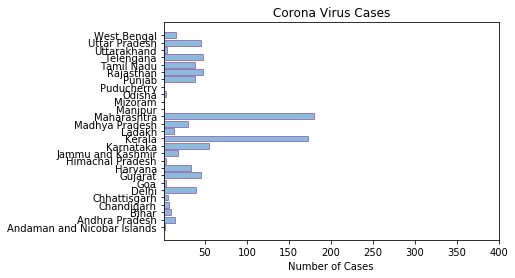

In [26]:
plt.barh(y_pos, performance, align='center', alpha=0.5, 
#color=(234/256.0, 128/256.0, 252/256.0), 
edgecolor=(106/256.0, 27/256.0, 154/256.0)) 

plt.yticks(y_pos, objects) 
plt.xlim(1,400) 
plt.xlabel('Number of Cases') 
plt.title('Corona Virus Cases') 
plt.show() 
